# **Heart Disease Prediction Model**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [40]:
df=pd.read_csv("./heart_disease_uci.csv")
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [41]:
df.drop(['id','dataset'],inplace=True,axis=1)

# Split the columns

In [42]:
# 0 Represent no disease while 1 means yes
df["target"]=df['num'].apply(lambda x:1 if x>0 else 0)

In [43]:
Y_train=df['target']
X_train=df.drop(['target','num'],axis=1)

In [44]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
Y_train

0      0
1      1
2      1
3      0
4      0
      ..
915    1
916    0
917    1
918    0
919    1
Name: target, Length: 920, dtype: int64

# Data Preprocessing

In [46]:
X_train.nunique()

age          50
sex           2
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
dtype: int64

In [47]:
X_train['sex']=X_train['sex'].map({"Male":1,"Female":0})
X_train['cp']=X_train['cp'].map({"typical angina":0,"asymptomatic":1,'non-anginal':2,'atypical angina':3})
X_train['restecg']=X_train['restecg'].map({"lv hypertrophy":0,"st-t abnormality":1,'normal':2})
X_train['slope']=X_train['slope'].map({"downsloping":0,"flat":1,'upsloping':2})
X_train['thal']=X_train['thal'].map({"fixed defect":0,"normal":1,'reversable defect':2})

In [49]:
X_train.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs          object
restecg     float64
thalch      float64
exang        object
oldpeak     float64
slope       float64
ca          float64
thal        float64
dtype: object

In [48]:
# Percentage of Null values
(X_train.isnull().sum()/911)*100

age          0.000000
sex          0.000000
cp           0.000000
trestbps     6.476400
chol         3.293085
fbs          9.879254
restecg      0.219539
thalch       6.037322
exang        6.037322
oldpeak      6.805708
slope       33.918771
ca          67.069155
thal        53.347969
dtype: float64

In [ ]:
X_train['trestbps'].fillna(X_train['trestbps'].mean(),inplace=True)
X_train['chol'].fillna(X_train['chol'].mean(),inplace=True)
X_train['restecg'].fillna(X_train['restecg'].mean(),inplace=True)
X_train['exang'].fillna(X_train['exang'].mean(),inplace=True)

In [51]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,1,0,145.000000,233.0,True,0.0,150.0,False,2.3,0.0,0.0,0.0
1,67,1,1,160.000000,286.0,False,0.0,108.0,True,1.5,1.0,3.0,1.0
2,67,1,1,120.000000,229.0,False,0.0,129.0,True,2.6,1.0,2.0,2.0
3,37,1,2,130.000000,250.0,False,2.0,187.0,False,3.5,0.0,0.0,1.0
4,41,0,3,130.000000,204.0,False,0.0,172.0,False,1.4,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,1,127.000000,333.0,True,1.0,154.0,False,0.0,NaN,NaN,NaN
916,62,1,0,132.132404,139.0,False,1.0,NaN,0.389595,NaN,NaN,NaN,NaN
917,55,1,1,122.000000,223.0,True,1.0,100.0,False,0.0,NaN,NaN,0.0
918,58,1,1,132.132404,385.0,True,0.0,NaN,0.389595,NaN,NaN,NaN,NaN


In [57]:
X_train['exang']=X_train['exang'].astype(int)
X_train['fbs']=X_train['fbs'].astype(int)

In [58]:
X_train.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg     float64
thalch      float64
exang         int64
oldpeak     float64
slope       float64
ca          float64
thal        float64
dtype: object

In [59]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,1,0,145.000000,233.0,1,0.0,150.0,0,2.3,0.0,0.0,0.0
1,67,1,1,160.000000,286.0,0,0.0,108.0,1,1.5,1.0,3.0,1.0
2,67,1,1,120.000000,229.0,0,0.0,129.0,1,2.6,1.0,2.0,2.0
3,37,1,2,130.000000,250.0,0,2.0,187.0,0,3.5,0.0,0.0,1.0
4,41,0,3,130.000000,204.0,0,0.0,172.0,0,1.4,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,1,127.000000,333.0,1,1.0,154.0,0,0.0,NaN,NaN,NaN
916,62,1,0,132.132404,139.0,0,1.0,NaN,0,NaN,NaN,NaN,NaN
917,55,1,1,122.000000,223.0,1,1.0,100.0,0,0.0,NaN,NaN,0.0
918,58,1,1,132.132404,385.0,1,0.0,NaN,0,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Correletaion Between features')

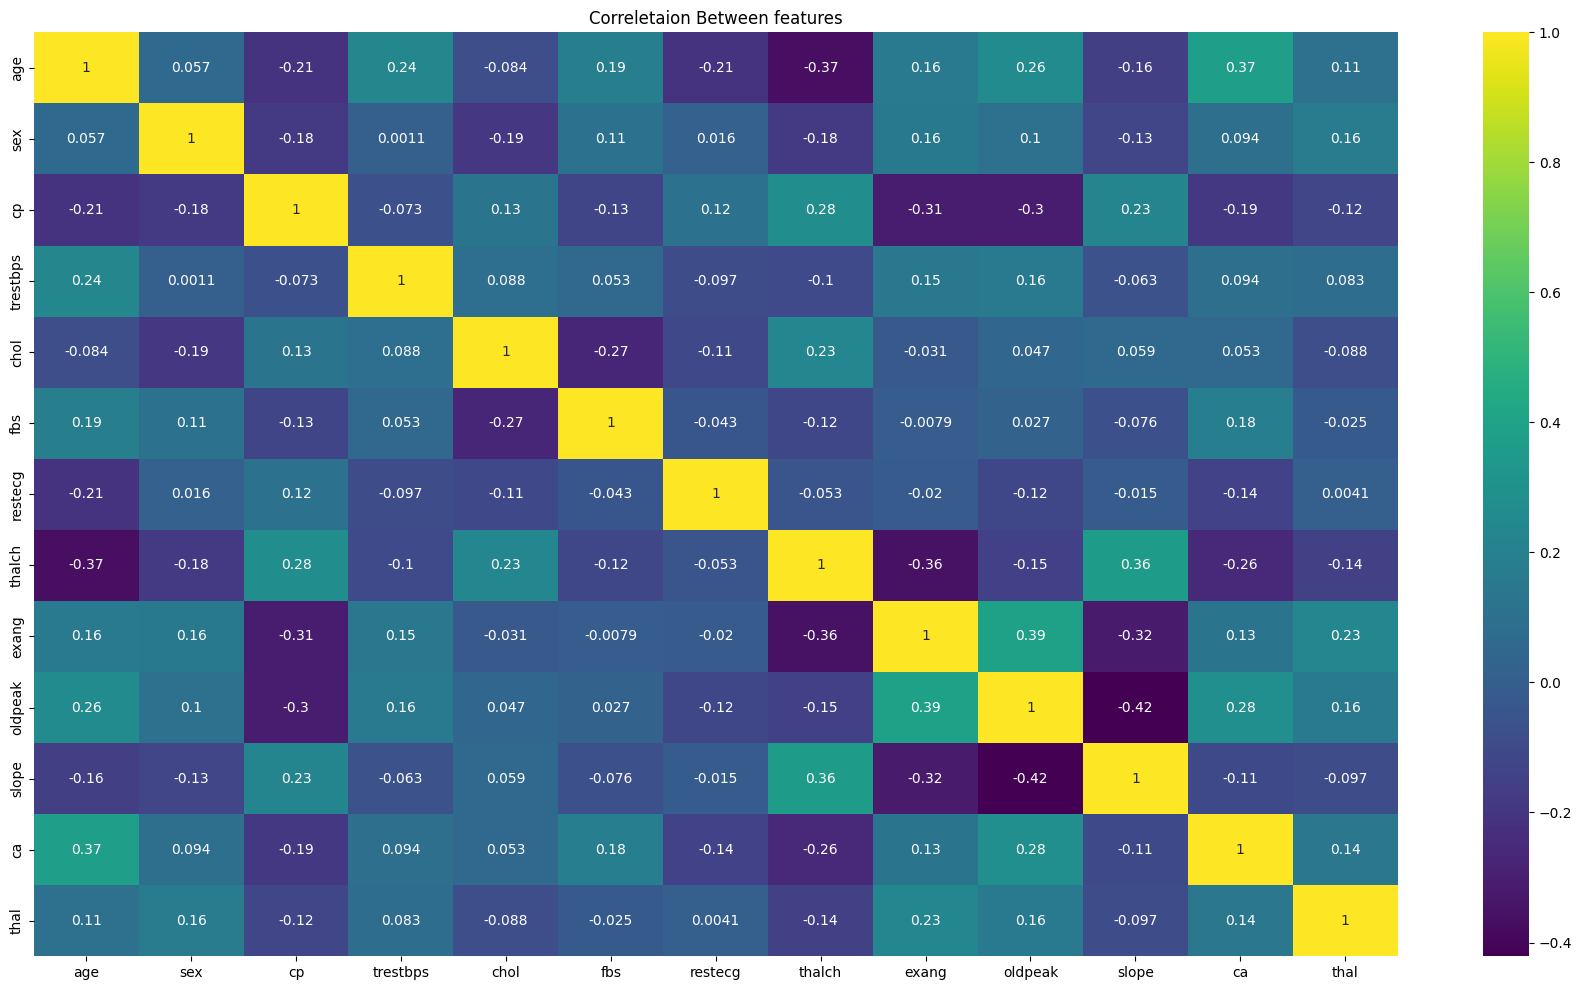

In [60]:
plt.figure(figsize=(22,12))
corr=X_train.corr()
sns.heatmap(corr,annot=True, cmap='viridis')
plt.title("Correletaion Between features")

- ### **As we have 67% missing ca values and it have correlation of 0.5 we need to use imputation**

In [64]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [65]:
Impute_cols=["cp","trestbps","fbs","restecg","thalch","exang","oldpeak",'ca',"thal",'slope']

In [66]:
Impute=IterativeImputer(estimator=RandomForestRegressor(),max_iter=10,random_state=44)
X_train[Impute_cols]=Impute.fit_transform(X_train[Impute_cols])

/home/maarij-aqeel/.venv/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [67]:
X_train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [68]:
X_train[['fbs','thalch','restecg','exang','slope','ca','thal']]=X_train[['fbs','thalch','restecg','exang','slope','ca','thal']].astype(int)

In [69]:
X_train.nunique()

age          50
sex           2
cp            4
trestbps     62
chol        218
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      64
slope         3
ca            4
thal          3
dtype: int64

# Ready the data

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [72]:
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.2,random_state=45)

In [75]:
# Standarize the data
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

# Train the Model

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [77]:
model=LogisticRegression()

In [78]:
model.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [79]:
predictions=model.predict(x_test_scaled)

In [93]:
print("Original y",y_train.iloc[0])

Original y 0


In [94]:
print("predicted y",predictions[0])

predicted y 1


In [81]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73        73
           1       0.84      0.77      0.80       111

    accuracy                           0.77       184
   macro avg       0.76      0.77      0.77       184
weighted avg       0.78      0.77      0.77       184



## Trying Different model

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
Randomforest=RandomForestClassifier()

In [97]:
Randomforest.fit(x_train_scaled,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [98]:
Random_predictions=Randomforest.predict(x_test_scaled)

In [100]:
print(classification_report(y_test,Random_predictions))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77        73
           1       0.85      0.86      0.85       111

    accuracy                           0.82       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.82      0.82       184



In [103]:
from sklearn.metrics import confusion_matrix

In [104]:
confusion_matrix(y_test,predictions)

array([[57, 16],
       [26, 85]])